# Prediction Using Unsupervised ML

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading the data and Creating DataFrame structure

In [7]:
iris=datasets.load_iris()

In [8]:
df=pd.DataFrame({
    'x':iris.data[:,0],
    'y':iris.data[:,1],
    'cluster' : iris.target
})

In [9]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


# Learning its features

In [59]:
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.051594,1.764836,0,r
1,4.9,3.0,0,0.440931,0.926140,1.914215,0,r
2,4.7,3.2,0,0.381602,1.187514,2.116492,0,r
3,4.6,3.1,0,0.521939,1.242335,2.212913,0,r
4,5.0,3.6,0,0.172105,1.192508,1.887407,0,r


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
x                  150 non-null float64
y                  150 non-null float64
cluster            150 non-null int32
distance_from_0    150 non-null float64
distance_from_1    150 non-null float64
distance_from_2    150 non-null float64
closest            150 non-null int64
color              150 non-null object
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 8.9+ KB


In [64]:
df=df.drop_duplicates()
df.isnull().sum()

x                  0
y                  0
cluster            0
distance_from_0    0
distance_from_1    0
distance_from_2    0
closest            0
color              0
dtype: int64

In [62]:
df.describe()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0000
mean,5.843333,3.057333,1.000000,1.124794,0.884703,1.168124,0.9800
std,0.828066,0.435866,0.819232,0.667959,0.476078,0.669630,0.8066
min,4.300000,2.000000,0.000000,0.028636,0.027472,0.075554,0.0000
25%,5.100000,2.800000,0.000000,0.536889,0.523907,0.590916,0.0000
50%,5.800000,3.000000,1.000000,1.092027,0.908968,1.146116,1.0000
75%,6.400000,3.300000,2.000000,1.568010,1.197875,1.796113,2.0000
max,7.900000,4.400000,2.000000,2.917811,2.397562,2.513869,2.0000


# Derving the K value using Elbow Method

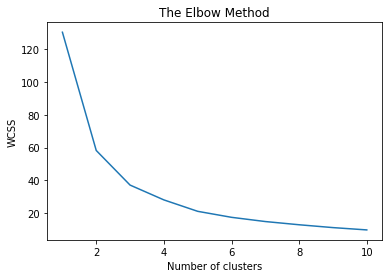

In [14]:
x=df.iloc[:, [0,1]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    centroids[i] = result_list

In [16]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

# Plotting Points

Text(0, 0.5, 'Sepal width')

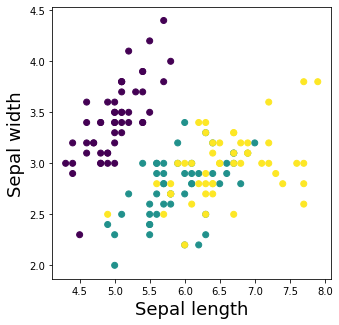

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],c=iris.target)
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)

# Defining colors and ploting centroidsfor all clusters 

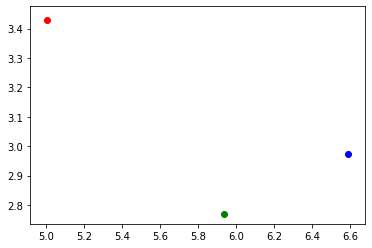

In [18]:
colmap = {0: 'r' , 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

# Showing complete graph

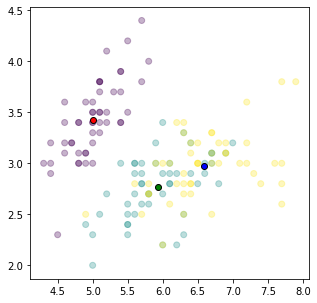

In [19]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i],edgecolor='k')
plt.show()

# Assignment Stage

# Assignment function : Calculating distance and updating dataframe

In [20]:
def assignment(df, centroids):
    for i in range(3):
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] -centroids[i][1]) ** 2
            )
        )
    
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
        
        

In [21]:
df = assignment(df, centroids)

In [22]:
df 

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


# Visualisation of Clusters with colors

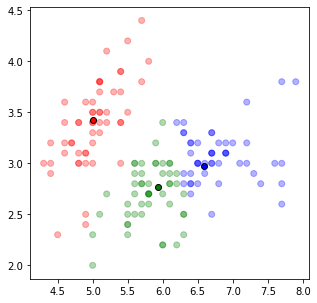

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
    
plt.show();

# Update Stage

update function : updating the centroids

In [24]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [25]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

# Visualising the graph with updated centroids

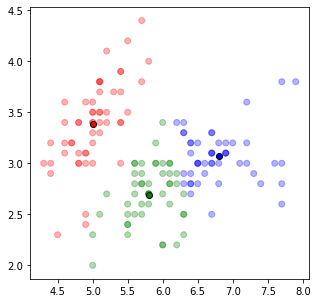

In [26]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
    
plt.show();

# Repeat assignment stage to reassign the points with clusters

In [27]:
df=assignment(df, centroids)

# Visualising the updated graph

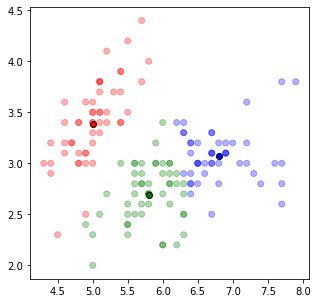

In [28]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
    
plt.show();

# Continuing untill all assigned clusters don't change any more

In [29]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result

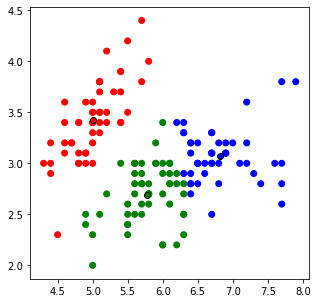

In [30]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
    
plt.show();